### LOAN APPROVAL PREDICTION

In [1]:
#import Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import Dataset 
data = pd.read_csv("C:/KSKarthik/Python_Practise/ML/loan_approval/train_ctrUa4K.csv")

### EDA

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
loan_df = data.copy()
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# fill in missing gender with most frequent value (Male)
loan_df['Gender']=loan_df['Gender'].fillna(loan_df['Gender'].value_counts().idxmax())
assert (loan_df['Gender'].isnull().all() == False)

In [8]:
# fill in missing Married status with most frequent value (Yes)
loan_df['Married']=loan_df['Married'].value_counts().idxmax()
assert (loan_df['Married'].isnull().all() == False)

In [9]:
# fill in missing Dependents value with most frequent value (0)
loan_df['Dependents'] = loan_df['Dependents'].value_counts().idxmax()
assert (loan_df['Dependents'].isnull().all() == False)

In [10]:
# fill in missing Self-Employed value with most frequent value (No)
loan_df['Self_Employed'] = loan_df['Self_Employed'].value_counts().idxmax()
assert (loan_df['Self_Employed'].isnull().all() == False)

In [11]:
# Applicant Minimum and Maximum Income
loan_df['ApplicantIncome'].min() , loan_df['ApplicantIncome'].max()

(150, 81000)

In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [13]:
# Remove duplicates, if any.  (Note: There is no duplicate instance/row) 
count_before = loan_df.shape[0]
loan_df = loan_df.drop_duplicates(keep='first')
count_after = loan_df.shape[0]
print(count_before)
print(count_after)
print("Difference:", count_before - count_after)

614
614
Difference: 0


In [14]:
# Fill Missing LoanAmount with Loan Mean 
loan_mean = np.round(loan_df['LoanAmount'].mean(), 2) 
loan_df.loc[loan_df['LoanAmount'].isnull() == True, 'LoanAmount'] = loan_mean
assert loan_df['LoanAmount'].isnull().all() == False

In [15]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [16]:
# fill in missing value of loan_amount_term with mean value
loan_Amount_term_mean = loan_df['Loan_Amount_Term'].mean()
loan_df.loc[loan_df['Loan_Amount_Term'].isnull() == True,'Loan_Amount_Term']=loan_Amount_term_mean
assert loan_df['Loan_Amount_Term'].isnull().all() == False

In [17]:
# fill in missing value of Credit History with forward filling method
loan_df['Credit_History'].fillna(method='ffill', inplace=True)
assert loan_df['Credit_History'].isnull().all() == False

In [18]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [19]:
# Encode Label
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
loan_df['Loan_Status'] = lencoder.fit_transform(loan_df['Loan_Status'])
loan_df['Loan_Status'].head()
print(loan_df.info())
loan_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int32
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 64.8+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Yes,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,1
1,LP001003,Male,Yes,0,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,No,3000,0.0,66.00,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,1
4,LP001008,Male,Yes,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,1


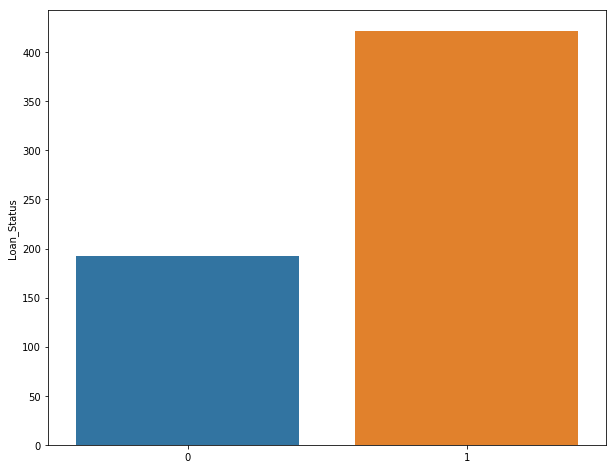

In [27]:
# Bar Chart on Label Count.  Class count is skwed, that is, not even. 
import seaborn as sns
class_count=loan_df['Loan_Status'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=class_count.index, y=class_count)
plt.show()

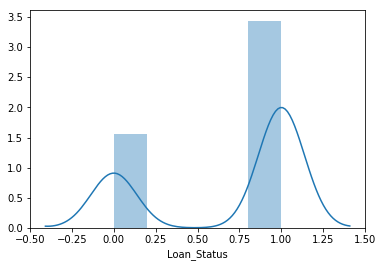

In [21]:
sns.distplot(loan_df.Loan_Status)
plt.show()

In [31]:
# Split into Data and Target. 
X = pd.get_dummies(loan_df.drop(columns=['Loan_ID','Loan_Status'],axis=1))
y = loan_df['Loan_Status']
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_Yes,Dependents_0,Education_Graduate,Education_Not Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.41,360.0,1.0,0,1,1,1,1,0,1,0,0,1
1,4583,1508.0,128.00,360.0,1.0,0,1,1,1,1,0,1,1,0,0
2,3000,0.0,66.00,360.0,1.0,0,1,1,1,1,0,1,0,0,1
3,2583,2358.0,120.00,360.0,1.0,0,1,1,1,0,1,1,0,0,1
4,6000,0.0,141.00,360.0,1.0,0,1,1,1,1,0,1,0,0,1


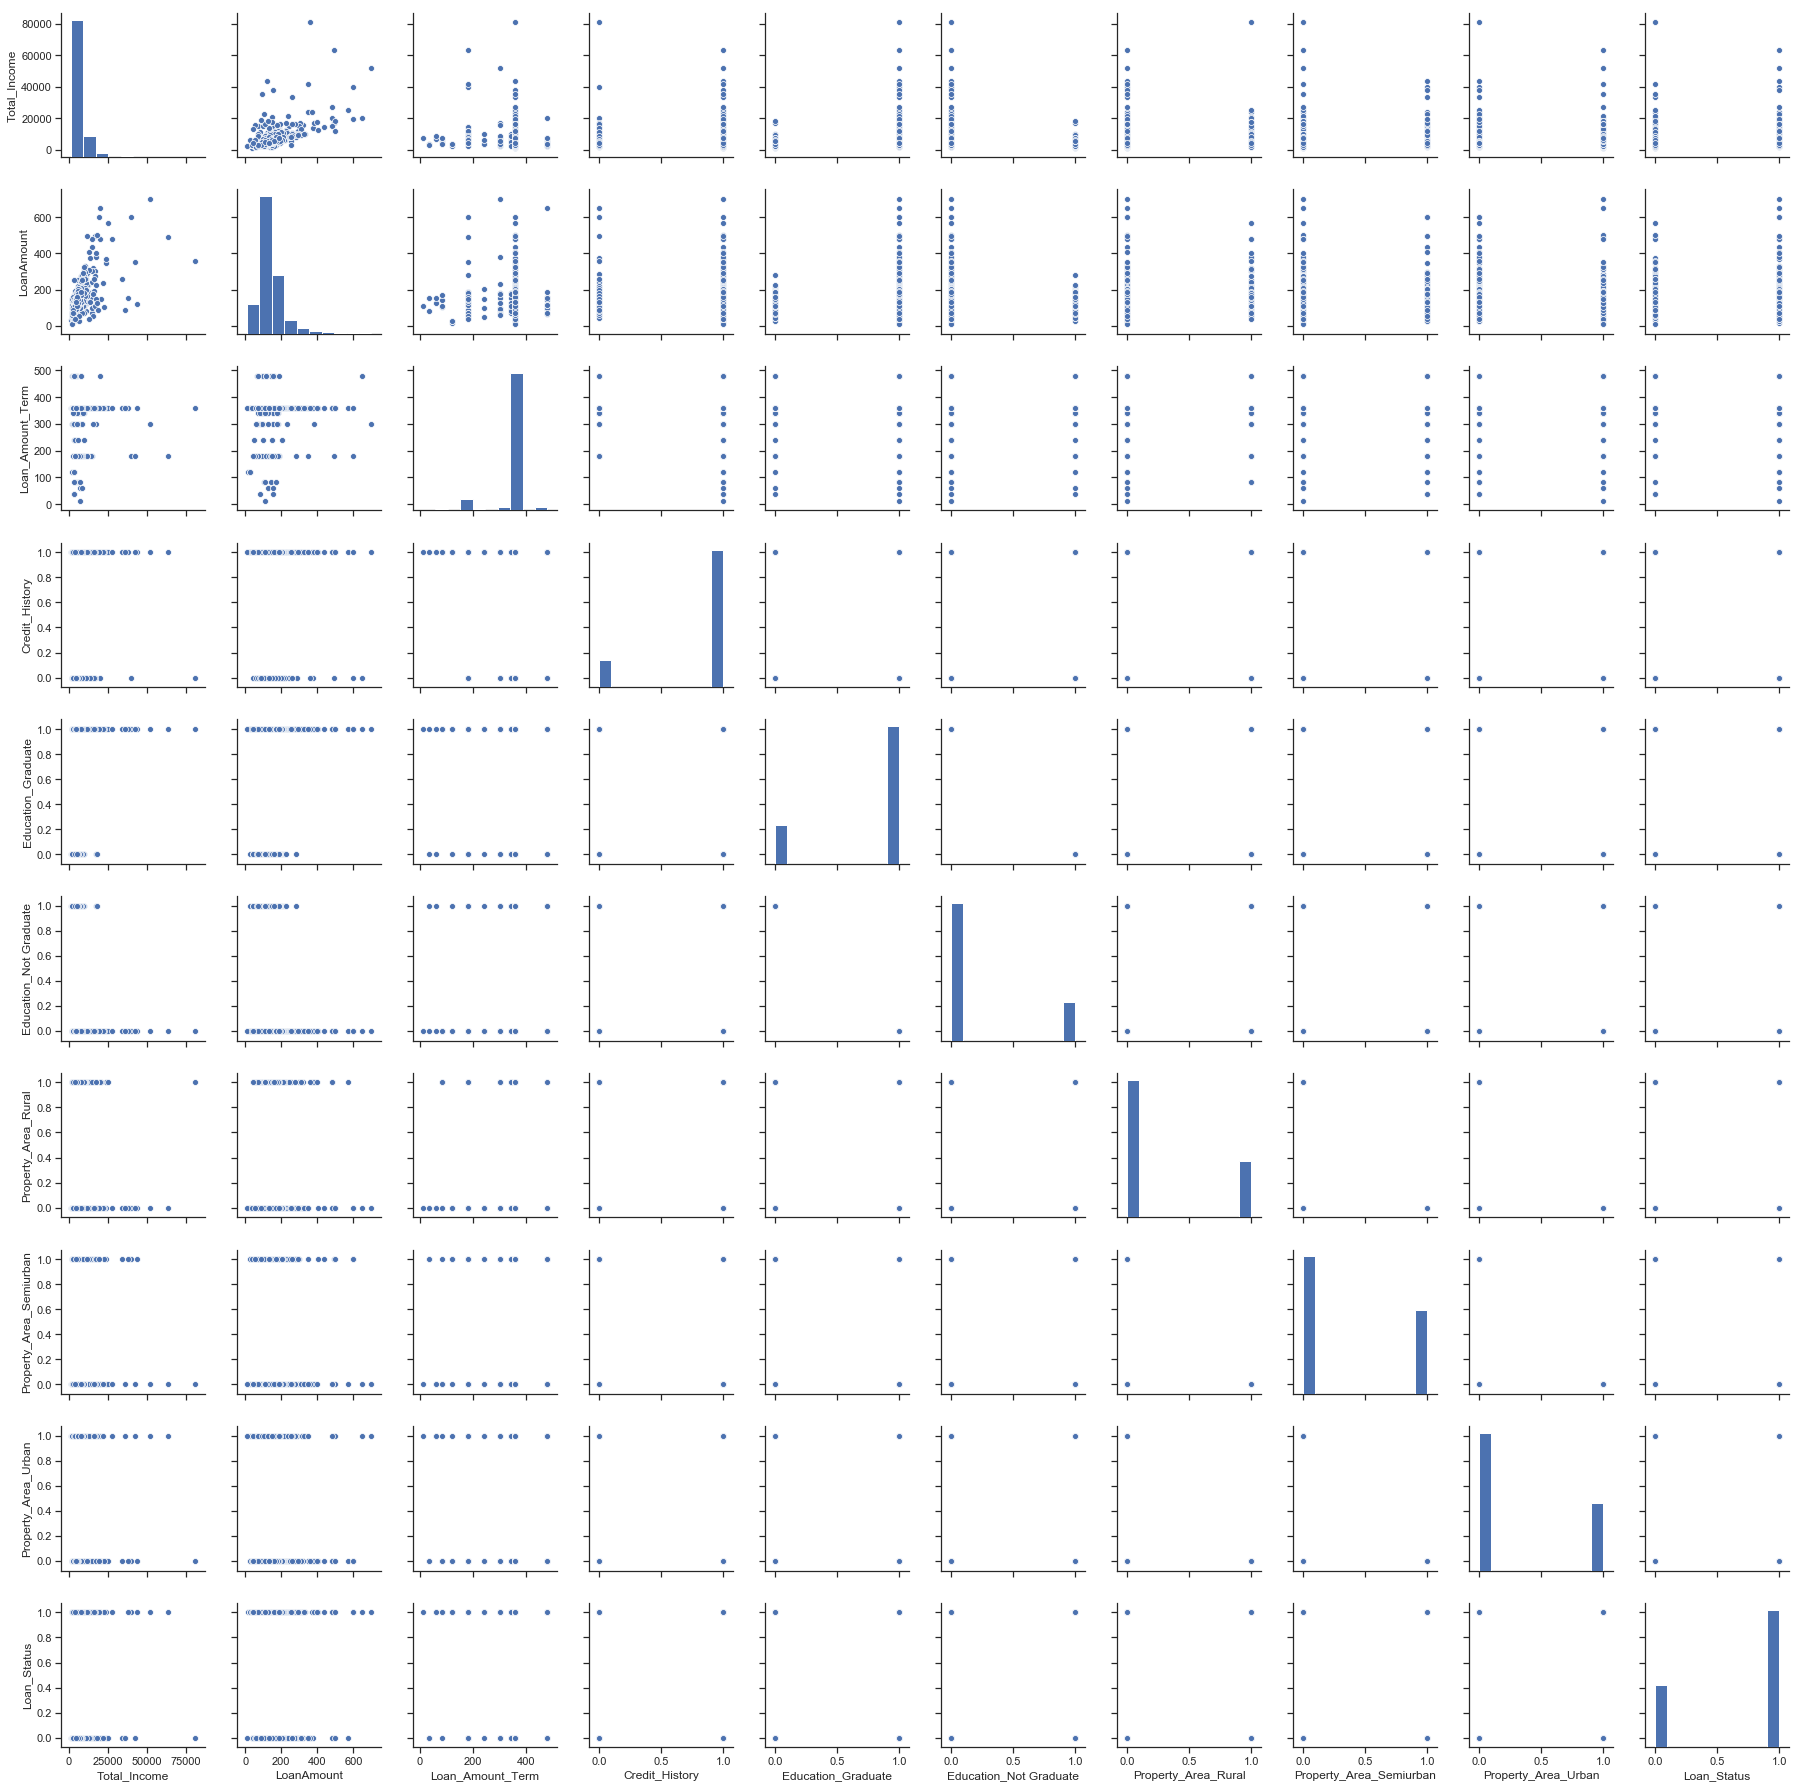

In [58]:
sns.set(style="ticks", color_codes=True)
tmp_df=pd.concat([X,y],axis=1)
tmp_df['Total_Income'] = tmp_df['ApplicantIncome'] + tmp_df['CoapplicantIncome']
tmp_df.head()
sns.pairplot(data = tmp_df[['Total_Income','LoanAmount','Loan_Amount_Term', 'Credit_History','Education_Graduate',
'Education_Not Graduate', 'Property_Area_Rural','Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status',
]])
plt.show()

In [35]:
#Split Data into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [59]:
# Measure performance using cross validation 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

model_list = []
results= []
names = []
model_list.append(('LR', LogisticRegression()))
model_list.append(('DT', DecisionTreeClassifier()))

for model_name, model in model_list:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(model_name)
    msg = "%s: %f (%f)" % (model_name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.804612 (0.051908)
DT: 0.710776 (0.031473)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [61]:
# fit the Model to the training data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
# predict with test data
y_pred = lr_model.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1]


In [63]:
# accuracy test
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8130081300813008
